In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# In this homework, we're using Fuel Economy Data from the EPA.
column_subset = [
  "id",
  "make",
  "model",
  "year",
  "cylinders",
  "fuelType",
  "trany",
  "mpgData",
  "city08",
  "highway08"
]

df = pd.read_csv(
  "https://www.fueleconomy.gov/feg/epadata/vehicles.csv",
  usecols=column_subset,
  nrows=100
)

df.head()

,city08,cylinders,fuelType,highway08,id,make,model,mpgData,trany,year
0,19,4,Regular,25,1,Alfa Romeo,Spider Veloce 2000,Y,Manual 5-spd,1985
1,9,12,Regular,14,10,Ferrari,Testarossa,N,Manual 5-spd,1985
2,23,4,Regular,33,100,Dodge,Charger,Y,Manual 5-spd,1985
3,10,8,Regular,12,1000,Dodge,B150/B250 Wagon 2WD,N,Automatic 3-spd,1985
4,17,4,Premium,23,10000,Subaru,Legacy AWD Turbo,N,Manual 5-spd,1993


##Question 1

Please fill in the code below to produce a scatter plot where number of cylinders is the independent variable (x variable) and highway mileage is the dependent variable (y variable).

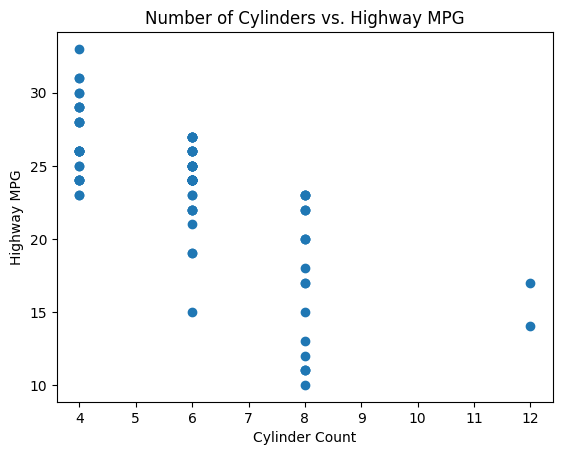

In [45]:
cylinders = df['cylinders']
highway_mileage = df['highway08']
plt.scatter(cylinders, highway_mileage)
plt.title('Number of Cylinders vs. Highway MPG')
plt.xlabel('Cylinder Count')
plt.ylabel('Highway MPG');


##Question 2

In one sentence, please describe the relationship between cylinder count and highway MPG.

**Write answer here.**

the generel trend seems to be the higer the **Cylinder** the lower the **MPG**

Let's build a simple linear regression model that fits the relationship between cylinders and highway MPG. In other words, we want to build a linear model that can be used to predict highway MPG from cylinder count.

#**Step 1: Creating the design matrix**

## Question 3

Please fill in the code below so the dataframe ```data``` contains only the cylinder and highway columns.

In [46]:
#start by slicing the dataframe to contain only the cylinder and highway columns
#hint: consider using .loc or .iloc!!
data = df.loc[:,['cylinders', 'highway08']]
data.head()

,cylinders,highway08
0,4,25
1,12,14
2,4,33
3,8,12
4,4,23


## Question 4

Please fill in the code below to convert ```data``` into a numpy array called ```X```.

In [47]:
#convert the dataframe to a matrix (multidimensional numpy array) that can be manipulated
X = data.values
X

array([[ 4, 25],
       [12, 14],
       [ 4, 33],
       [ 8, 12],
       [ 4, 23],
       [ 4, 24],
       [ 4, 29],
       [ 4, 26],
       [ 4, 31],
       [ 4, 30],
       [ 4, 30],
       [ 4, 26],
       [ 4, 29],
       [ 4, 26],
       [ 8, 15],
       [ 4, 28],
       [ 4, 23],
       [ 4, 26],
       [ 6, 22],
       [ 6, 24],
       [ 8, 20],
       [ 8, 20],
       [12, 17],
       [ 4, 28],
       [ 6, 24],
       [ 8, 17],
       [ 6, 26],
       [ 6, 25],
       [ 6, 27],
       [ 6, 26],
       [ 6, 25],
       [ 8, 23],
       [ 8, 23],
       [ 8, 23],
       [ 8, 23],
       [ 4, 26],
       [ 8, 17],
       [ 6, 25],
       [ 6, 27],
       [ 6, 24],
       [ 6, 24],
       [ 6, 24],
       [ 6, 19],
       [ 6, 19],
       [ 6, 23],
       [ 6, 24],
       [ 6, 24],
       [ 8, 11],
       [ 4, 24],
       [ 6, 26],
       [ 6, 24],
       [ 4, 24],
       [ 4, 26],
       [ 4, 29],
       [ 6, 24],
       [ 6, 26],
       [ 6, 27],
       [ 6, 24],
       [ 8, 11

In [48]:
#separate the features from the observed scores (target vector Y)
#in this case, we only have one feature: cylinder count
X = X[:, 0].reshape(X.shape[0], 1)
X

array([[ 4],
       [12],
       [ 4],
       [ 8],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 8],
       [ 4],
       [ 4],
       [ 4],
       [ 6],
       [ 6],
       [ 8],
       [ 8],
       [12],
       [ 4],
       [ 6],
       [ 8],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 8],
       [ 8],
       [ 8],
       [ 8],
       [ 4],
       [ 8],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 8],
       [ 4],
       [ 6],
       [ 6],
       [ 4],
       [ 4],
       [ 4],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 8],
       [ 6],
       [ 6],
       [ 6],
       [ 6],
       [ 8],
       [ 4],
       [ 4],
       [ 6],
       [ 8],
       [ 8],
       [ 8],
       [ 8],
       [ 6],
       [ 8],
       [ 6],
       [ 6],
       [ 4],
       [ 4],

## Question 5

Please fill in the code below to modify ```X``` so it has 2 columns:
1. Column one should contain all 1's (column of intercepts).
2. Column two should be the column containing cylinder data.

In [49]:
#add the intercept terms (column of 1's)
X = np.hstack([np.ones((X.shape[0], 1)), X])
X


array([[ 1.,  4.],
       [ 1., 12.],
       [ 1.,  4.],
       [ 1.,  8.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  8.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  4.],
       [ 1.,  6.],
       [ 1.,  6.],
       [ 1.,  8.],
       [ 1.,  8.],
       [ 1., 12.],
       [ 1.,  4.],
       [ 1.,  6.],
       [ 1.,  8.],
       [ 1.,  6.],
       [ 1.,  6.],
       [ 1.,  6.],
       [ 1.,  6.],
       [ 1.,  6.],
       [ 1.,  8.],
       [ 1.,  8.],
       [ 1.,  8.],
       [ 1.,  8.],
       [ 1.,  4.],
       [ 1.,  8.],
       [ 1.,  6.],
       [ 1.,  6.],
       [ 1.,  6.],
       [ 1.,  6.],
       [ 1.,  6.],
       [ 1.,  6.],
       [ 1.,  6.],
       [ 1.,  6.],
       [ 1.,  6.],
       [ 1.,  6.],
       [ 1.,  8.],
       [ 1.,  4.],
       [ 1.,  6.],
       [ 1.,  6.],
       [ 1.,  4.],
       [ 1.,

#**Step 2: Store the observed scores**

## Question 6

Please fill in the code below to create the numpy array ```Y```.

The shape of ```Y``` should be (X.shape[0], 1).

In [50]:
Y = data.iloc[:, 1].values.reshape(-1, 1)
Y


array([[25],
       [14],
       [33],
       [12],
       [23],
       [24],
       [29],
       [26],
       [31],
       [30],
       [30],
       [26],
       [29],
       [26],
       [15],
       [28],
       [23],
       [26],
       [22],
       [24],
       [20],
       [20],
       [17],
       [28],
       [24],
       [17],
       [26],
       [25],
       [27],
       [26],
       [25],
       [23],
       [23],
       [23],
       [23],
       [26],
       [17],
       [25],
       [27],
       [24],
       [24],
       [24],
       [19],
       [19],
       [23],
       [24],
       [24],
       [11],
       [24],
       [26],
       [24],
       [24],
       [26],
       [29],
       [24],
       [26],
       [27],
       [24],
       [11],
       [25],
       [24],
       [21],
       [22],
       [22],
       [25],
       [24],
       [22],
       [20],
       [18],
       [11],
       [22],
       [24],
       [22],
       [27],
       [25],
       [28],
       [31],

#**Step 3: Create a Linear Model That Fits Our Data**

In [51]:
from sklearn.linear_model import LinearRegression

## Question 7

Please fill in the code below to instantiate a linear model and fit ```X``` to ```Y```.

In [53]:
#creating a model instance and fitting it to our data (i.e. calculating the optimal beta values)
model = LinearRegression().fit(X,Y)

#**Step 4: Observe Model Coefficients and Make Model Predictions**

## Question 8

Please fill in the code below to observe the model coefficients and make predictions using ```X```.

In [54]:
#get model coefficients
#the first coefficient (intercept) will be a 0 here because there is a separate method for extracting the intercept
#the second coefficient (slope) is the one we care aobut here
coefficients = model.coef_
coefficients

array([[ 0.        , -1.97720819]])

In [55]:
#get intercept term
intercept_term = model.intercept_
intercept_term

array([35.21461665])

In [56]:
#make predictions using the data we have
preds = model.predict(X)
preds

array([[27.30578389],
       [11.48811837],
       [27.30578389],
       [19.39695113],
       [27.30578389],
       [27.30578389],
       [27.30578389],
       [27.30578389],
       [27.30578389],
       [27.30578389],
       [27.30578389],
       [27.30578389],
       [27.30578389],
       [27.30578389],
       [19.39695113],
       [27.30578389],
       [27.30578389],
       [27.30578389],
       [23.35136751],
       [23.35136751],
       [19.39695113],
       [19.39695113],
       [11.48811837],
       [27.30578389],
       [23.35136751],
       [19.39695113],
       [23.35136751],
       [23.35136751],
       [23.35136751],
       [23.35136751],
       [23.35136751],
       [19.39695113],
       [19.39695113],
       [19.39695113],
       [19.39695113],
       [27.30578389],
       [19.39695113],
       [23.35136751],
       [23.35136751],
       [23.35136751],
       [23.35136751],
       [23.35136751],
       [23.35136751],
       [23.35136751],
       [23.35136751],
       [23

#**Step 5: Evaluate Model Performance**

## Question 9

Please fill in the code below to compute the R-squared value of the regression model. Consider using Sklearn's ```score``` function.

In [57]:
#evaluate model performance
r_sq = model.score(X, Y)
r_sq

0.5081810424158184

## Question 10

In one sentence, interpret the meaning of the coefficient of determination we obtained above.

**Write answer here.**

it shows how good the model fits the data

# **Model Visualization**

Below, we add our model predictions to the scatterplot generated above.

''

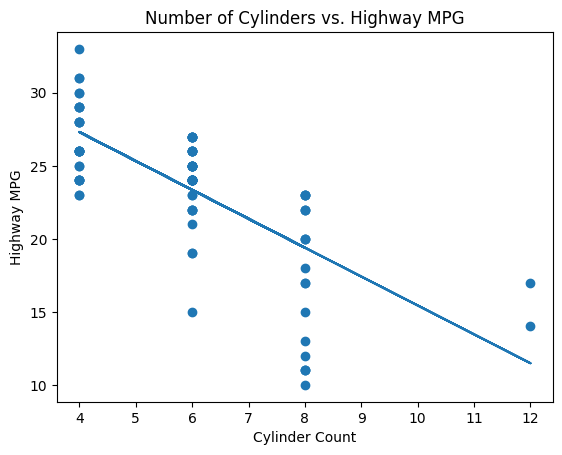

In [58]:
cylinders = df['cylinders']
highway_mileage = df['highway08']
plt.scatter(cylinders, highway_mileage)
plt.title('Number of Cylinders vs. Highway MPG')
plt.xlabel('Cylinder Count')
plt.ylabel('Highway MPG')

#add least-squares regression line
plt.plot(cylinders, preds);
;

# **Comparing Methods of Finding Our Model Parameters**

## *Method 1*

$$ \beta_1 = r * (\sigma_y / \sigma_x) $$
$$ \beta_0 = \bar y - \beta_1 * \bar x $$

## Question 11

Please fill in the code cells below to compute $$ r, \bar y, \sigma_y, \bar x, \sigma_x, \beta_0, \beta_1 $$

In [59]:
#compute the correlation coefficient r between cylinders and highway_mileage using Pandas
r = df['cylinders'].corr(df['highway08'])
r

np.float64(-0.7128681802520156)

In [60]:
#compute standard deviation of cylinders and highway_mileage using Pandas
cylinder_sdev= df['cylinders'].std()
highway_mileage_sdev = df['highway08'].std()
cylinder_sdev, highway_mileage_sdev

(np.float64(1.6442123778375906), np.float64(4.560380544107115))

In [61]:
#compute the slope parameter of our model
beta_1 =  r * (highway_mileage_sdev/ cylinder_sdev)
beta_1

np.float64(-1.977208190106116)

In [62]:
#compute the mean of cylinders and highway_mileage using Pandas
cylinder_mean = df['cylinders'].mean()
highway_mileage_mean = df['highway08'].mean()
cylinder_mean, highway_mileage_mean

(np.float64(5.94), np.float64(23.47))

In [64]:
#compute the intercept paramter of our model
beta_0 = highway_mileage_mean - beta_1 * cylinder_mean
beta_0

np.float64(35.21461664923033)

## Question 12

Please compare the model parameters produced using Sklearn with the parameters computed through Method 1 above.

**Write answer here.**

skelarn 

-1.97720819

35.21461665

method 1

-1.977208190106116

35.21461664923033

##*Method 2*

$$ \hat \beta = (X^T X)^{-1}X^T Y $$

We will now use the analytical solution to compute the model parameters.

In [65]:
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y
beta_hat

array([[35.21461665],
       [-1.97720819]])

##Question 13

Please compare the model parameters we have obtained using Method 2 with those obtained using Sklearn and Method 1.

**Write answer here.**


skelarn 

[-1.97720819]

[35.21461665]

method 1

[-1.977208190106116]

[35.21461664923033]

method 2 

[35.21461665]

[-1.97720819]

## Question 14

In a few sentences, describe the relationship between simple linear regression and multiple linear regression.

**Write answer here.**


Simple linear regression looks at the relationship between one independent variable (like the number of cylinders) and one dependent variable (like highway MPG). Multiple linear regression looks at the relationship between more than one independent variable (like cylinders, fuel type, and year) and the dependent variable. Both try to predict the outcome, but multiple linear regression uses more factors to make better predictions.